In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

In [254]:
df = pd.DataFrame({
    78:      [0,  2.75,    4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,   5.25, np.nan],
    78.01:      [0,  2.75,    4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,   5.25, np.nan],
    77:      [0,   2.5,    4, np.nan, np.nan, np.nan, np.nan, np.nan,      5, np.nan, np.nan],
    77.01:      [0,   2.5,    4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,   5.25, np.nan],
    75:      [0,   2.5, 3.75, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,      5, np.nan],
    75.01:      [0,   2.5, 3.75, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,      5, np.nan],
    74:      [0,  2.25,  3.5, np.nan, np.nan, np.nan, np.nan,   4.25, np.nan, np.nan, np.nan],
    74.01:      [0,  2.25,  3.5, np.nan, np.nan, np.nan, np.nan, np.nan,    4.5, np.nan, np.nan],
    72:      [0,     2,    3,    3.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    72.01:      [0,     2,    3,    3.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    72.001:      [0,     2,    3, np.nan, np.nan, np.nan, np.nan, np.nan,      4, np.nan, np.nan],
    72.0001:      [0,     2,    3, np.nan, np.nan, np.nan, np.nan, np.nan,      4, np.nan, np.nan],
    66:      [0,  1.75,  2.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,    3.5, np.nan],
    66.01:      [0,  1.75,  2.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,    3.5, np.nan],
    62:      [0,   1.5, 2.25, np.nan, np.nan, np.nan, np.nan, np.nan,   2.75, np.nan, np.nan],
    62.01:      [0,   1.5, 2.25, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,      3, np.nan],
    60:      [0,   1.5, 2.25, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,      3, np.nan],
    60.01:      [0,   1.5, 2.25, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,      3, np.nan],
    59:      [0,  1.25,    2, np.nan, np.nan,    2.5, np.nan, np.nan, np.nan, np.nan, np.nan],
    59.01:      [0,  1.25,    2, np.nan,   2.25, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    }, index=[180, 135,   90,     65,     60,     55,     50,     45,     40,     35,     30])
df

,59.0,59.01,60.0,60.01,62.0,62.01,66.0,66.01,72.0,72.0001,72.001,72.01,74.0,74.01,75.0,75.01,77.0,77.01,78.0,78.01
180,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
135,1.25,1.25,1.50,1.50,1.50,1.50,1.75,1.75,2.0,2.0,2.0,2.0,2.25,2.25,2.50,2.50,2.5,2.50,2.75,2.75
90,2.00,2.00,2.25,2.25,2.25,2.25,2.50,2.50,3.0,3.0,3.0,3.0,3.50,3.50,3.75,3.75,4.0,4.00,4.00,4.00
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,2.75,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,4.50,NaN,NaN,5.0,NaN,NaN,NaN
35,NaN,NaN,3.00,3.00,NaN,3.00,3.50,3.50,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,NaN,5.25,5.25,5.25


In [316]:
short = df[[59.0,59.01,60.0,60.01,62.0,62.01]]
medium = df[[66.0,66.01,72,72.01,72.001,72.0001]]
tall=df[[74.0,74.01,75.0,75.01,77.0,77.01,78.0,78.01]]

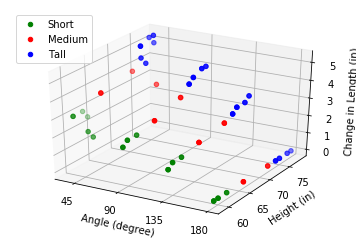

In [332]:
fig = plt.figure()
ax = plt.axes(projection='3d')


y = short.columns
x = short.index
x,y = np.meshgrid(y,x)
z = short
scatterGreen = ax.scatter3D(y, x, z, c= "green");

y = medium.columns
x = medium.index
x,y = np.meshgrid(y,x)
z = medium
scatterRed = ax.scatter3D(y, x, z, c= "red");

y = tall.columns
x = tall.index
x,y = np.meshgrid(y,x)
z = tall
scatterBlue = ax.scatter3D(y, x, z, c= "blue");


ax.set_xlabel("Angle (degree)")
ax.set_ylabel("Height (in)")
ax.set_zlabel("Change in Length (in)")


ticksX = [45,90,135,180]
ticks = [60,65,70,75]
ax.set_yticks(ticks)
ax.set_xticks(ticksX)


ax.legend([scatterGreen, scatterRed, scatterBlue], ['Short', 'Medium','Tall'], numpoints = 1, loc=2)


ax.figure.savefig('3dAngleToLength.eps', format='eps', dpi=1000)



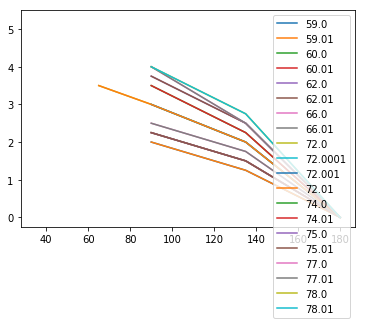